In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=1.6)

from sklearn.preprocessing import StandardScaler


..
1.	데이터 전처리


In [2]:
data=pd.read_csv('loan.csv',parse_dates=True)
#데이터 설명
#decsr=pd.read_excel('LCDataDictionary.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
data.shape

(887379, 74)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.value_counts(data.loan_status).to_frame().reset_index()

,index,loan_status
0,Current,601779
1,Fully Paid,207723
2,Charged Off,45248
3,Late (31-120 days),11591
4,Issued,8460
5,In Grace Period,6253
6,Late (16-30 days),2357
7,Does not meet the credit policy. Status:Fully ...,1988
8,Default,1219
9,Does not meet the credit policy. Status:Charge...,761






타겟변수가 총 10개의 카테고리를 가지고있다. 

이진 분류 (Binary Classification)를 해야하므로 2개로 나누어준다.

이때 이미 상환이 완료된 'Fully Paid'와 
'Does not meet the credit policy. Status:Fully Paid' 카테고리를 제외한다.

'Current' 에 0을  나머지에 1 할당하여 카테고리를 나눠준다.
(Current는 상환능력이 좋은 상태, 나머지는 나쁜 상태)

In [6]:
data=data[data.loan_status != 'Fully Paid']
data=data[data.loan_status != 'Does not meet the credit policy. Status:Fully Paid']

In [7]:
#'rating' column 생성
data['rating']=np.where((data.loan_status != 'Current'),1,0)

In [8]:
pd.value_counts(data.rating).to_frame()

,rating
0,601779
1,75889


In [9]:
print ('Bad Loan Ratio: %.2f%%'  % (data.rating.sum()/len(data)*100))

Bad Loan Ratio: 11.20%


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677668 entries, 1 to 887378
Data columns (total 75 columns):
id                             677668 non-null int64
member_id                      677668 non-null int64
loan_amnt                      677668 non-null float64
funded_amnt                    677668 non-null float64
funded_amnt_inv                677668 non-null float64
term                           677668 non-null object
int_rate                       677668 non-null float64
installment                    677668 non-null float64
grade                          677668 non-null object
sub_grade                      677668 non-null object
emp_title                      636806 non-null object
emp_length                     640234 non-null object
home_ownership                 677668 non-null object
annual_inc                     677668 non-null float64
verification_status            677668 non-null object
issue_d                        677668 non-null object
loan_status          

In [11]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rating
count,6.776680e+05,6.776680e+05,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,6.776680e+05,677668.000000,677665.000000,677665.000000,340018.000000,110520.000000,677665.000000,677665.000000,6.776680e+05,677352.000000,677665.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677668.000000,677640.000000,182912.000000,677668.0,510.000000,508.000000,677665.000000,663069.000000,6.630690e+05,21228.000000,21228.000000,21228.000000,21228.000000,20670.000000,21228.000000,18491.000000,21228.00000,21228.000000,21228.000000,21228.000000,6.630690e+05,21228.000000,21228.000000,21228.000000,677668.000000
mean,3.866300e+07,4.157932e+07,15204.447716,15199.533584,15181.267149,13.236162,444.373056,7.530143e+04,18.787453,0.336159,0.645419,33.730941,69.180972,11.745929,0.211608,1.741430e+04,55.652283,25.290514,11003.554141,10999.086776,5211.955100,5202.947365,3442.149258,1709.267641,0.408798,60.129403,6.391156,445.686636,0.016856,44.219073,1.0,110126.072392,18.311516,0.005628,227.068497,1.384514e+05,1.107076,2.927831,0.760835,1.673262,20.914030,36553.425287,71.520853,1.38713,2.971547,5890.493970,60.844738,3.243926e+04,0.941822,1.533258,1.972913,0.111986
std,2.115931e+07,2.228303e+07,8500.191965,8497.347475,8499.036628,4.419757,243.688371,6.630349e+04,19.156159,0.898238,0.950082,21.897927,27.380392,5.427083,0.620046,2.316333e+04,23.445051,11.848219,8114.724284,8111.423772,5499.580888,5490.388410,3849.780932,2115.943122,4.190767,467.907294,72.168452,444.578073,0.145590,22.304100,0.0,52679.993391,7.176231,0.082752,2003.379401,1.529547e+05,1.241727,3.089405,0.994372,1.685944,27.206603,43136.364930,23.022461,1.51922,2.629371,5289.584863,20.010782,3.896540e+04,1.444065,2.713321,2.864009,0.315349
min,5.641300e+04,7.069400e+04,500.000000,500.000000,0.000000,5.320000,15.910000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,1.854461e+07,2.065730e+07,8725.000000,8700.000000,8650.000000,9.990000,267.550000,4.500000e+04,12.450000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.669750e+03,38.500000,17.000000,4627.780000,4626.890000,1407.270000,1403.490000,878.930000,395.880000,0.000000,0.000000,0.000000,258.100000,0.000000,27.000000,1.0,76099.000000,13.197500,0.000000,0.000000,3.002000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10249.250000,58.600000,0.00000,1.000000,2413.750000,47.700000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,4.229813e+07,4.526422e+07,14000.000000,14000.000000,14000.000000,12.990000,389.980000,6.500000e+04,18.290000,0.000000,0.000000,30.000000,69.000000,11.000000,0.000000,1.221000e+04,56.400000,24.000000,9564.250000,9559.345000,3420.580000,3414.340000,2155.610000,1003.610000,0.000000,0.000000,0.000000,383.250000,0.000000,44.000000,1.0,101885.500000,17.660000,0.000000,0.000000,7.907400e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24687.500000,74.900000,1.00000,2.000000

.
.
2.	변수 확인 및 처리 – 삭제 및 변형

숫자형 변수가 아닌 경우 숫자형 변수로 바꿔주거나, 분석에 활용되지 않는 컬럼을 삭제한다. 

In [12]:
pd.value_counts(data.title)

Debt consolidation                 355393
Credit card refinancing            145252
Home improvement                    34426
Other                               27143
Major purchase                      10240
Debt Consolidation                   6484
Medical expenses                     5597
Business                             5503
Car financing                        4720
Moving and relocation                3311
                                    ...  
MY PERSONAL LOAN                        1
Rebuilding Finances                     1
Pay Bills                               1
on my way                               1
repair my health                        1
Zero Debt                               1
Refinancing my credit card debt         1
CLEAN HOUSE                             1
TRUCK LOAN                              1
NEW DAWN - NEW DAY                      1
Name: title, Length: 27532, dtype: int64

In [13]:
pd.value_counts(data.purpose)

debt_consolidation    402643
credit_card           163661
home_improvement       39026
other                  31250
major_purchase         11786
small_business          6913
medical                 6219
car                     5614
moving                  3780
vacation                3405
house                   2308
wedding                  614
renewable_energy         360
educational               89
Name: purpose, dtype: int64

위의 title 변수는 대출의 목적을 설명하는 변수이다. 지나치게 지협적이고 분석에 도움이 되지 않아 보이므로 drop 한다.

In [14]:
pd.value_counts(data.application_type)

INDIVIDUAL    677158
JOINT            510
Name: application_type, dtype: int64

In [15]:
#대출 형태 : INDIVIDUAL, JOINT --> 0,1로 변환
app_type={'INDIVIDUAL':0,'JOINT':1}
data.application_type.replace(app_type,inplace=True)

In [16]:
pd.value_counts(data.term)

 36 months    451761
 60 months    225907
Name: term, dtype: int64

In [17]:
#대출 기간을 숫자로 변환
term={' 36 months':36,' 60 months':60}
data.term.replace(term,inplace=True)

In [18]:
pd.value_counts(data.grade)

C    192701
B    187720
D    109028
A    108433
E     57399
F     18166
G      4221
Name: grade, dtype: int64

In [19]:
grade=data.grade.unique()
grade.sort()
grade

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [20]:
for x,e in enumerate(grade):
    data.grade.replace(to_replace=e,value=x,inplace=True)

In [21]:
pd.value_counts(data.grade)

2    192701
1    187720
3    109028
0    108433
4     57399
5     18166
6      4221
Name: grade, dtype: int64

In [22]:
#grade의 인덱스를 숫자로 바꾸고, 
#순서를 주기 ex) A가 가장 높은 등급(0), G는 가장 낮은 등급순서(6)
data.grade.unique()

array([2, 1, 5, 3, 0, 4, 6], dtype=int64)

In [23]:
pd.value_counts(data.sub_grade)

B4    40963
C1    40811
B3    40453
C2    40321
C3    39839
C4    39261
B5    36550
B2    35702
B1    34052
A5    33758
      ...  
F1     5716
F2     4238
F3     3484
F4     2691
F5     2037
G1     1451
G2     1082
G3      771
G4      482
G5      435
Name: sub_grade, Length: 35, dtype: int64

In [24]:
sub_grade=data.sub_grade.unique()
sub_grade.sort()
sub_grade

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [25]:
#sub_grade에도 똑같은 방식으로 숫자 인덱스로 바꾸고 순서 주기
for x,e in enumerate(sub_grade):
    data.sub_grade.replace(to_replace=e,value=x,inplace=True)

data.sub_grade.unique()

array([13,  9, 14, 26, 10,  6,  8,  7, 11, 16,  4,  5, 23, 17, 28, 18, 19,
        1, 12,  2, 25, 15,  3, 24, 20, 21, 22, 32, 31, 30, 27, 29,  0, 33,
       34], dtype=int64)

In [26]:
#직업의 이름을 보여주는 변수로 분석에 활용되지 않으므로 drop한다
pd.value_counts(data.emp_title)

Teacher                                 11875
Manager                                  9680
Owner                                    5028
Registered Nurse                         4836
RN                                       4657
Supervisor                               4297
Sales                                    3674
Project Manager                          3406
Driver                                   3175
Office Manager                           3022
                                        ...  
SUPERVISORY INVESTIGATIVE SPECIALIST        1
Burns & McDonnell                           1
Administrative Associate                    1
Teacher,coach                               1
LEARNING SUPPORT SPECIALIST                 1
Supervisor Security Shift                   1
radnet                                      1
VOANS PACE                                  1
Abeinsa EPC                                 1
SHIPPING DEPT                               1
Name: emp_title, Length: 212530, d

In [27]:
#고용 근속 상태 : 개인이 안정적인 직장을 가지고 있는지 암시하므로 활용한다.
pd.value_counts(data.emp_length)

10+ years    227507
2 years       59076
< 1 year      53210
3 years       52986
1 year        42946
5 years       40726
4 years       38958
8 years       34185
7 years       33043
6 years       30791
9 years       26806
Name: emp_length, dtype: int64

In [28]:
#스트링을 숫자형 변수로 바꾸기 (Nan값은 0으로)
emp_len={'n/a':0,'< 1 year':1,'1 year':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
data.emp_length.replace(emp_len,inplace=True)
data.emp_length=data.emp_length.replace(np.nan,0)
data.emp_length.unique()

array([ 1.,  2.,  9.,  5.,  4., 11., 10.,  3.,  8.,  7.,  6.,  0.])

In [29]:
#거주형태는 개인의 경제력을 보여주므로 분석에 활용
pd.value_counts(data.home_ownership)

MORTGAGE    337683
RENT        270560
OWN          69372
OTHER           41
NONE            10
ANY              2
Name: home_ownership, dtype: int64

In [30]:
#소득의 원천이 증명되었는지 보여주는 변수
pd.value_counts(data.verification_status)

Source Verified    269079
Verified           217016
Not Verified       191573
Name: verification_status, dtype: int64

In [31]:
# y의 개수가 현저히 적으므로 드랍한다.
pd.value_counts(data.pymnt_plan)

n    677660
y         8
Name: pymnt_plan, dtype: int64

In [32]:
#zip_code (우편번호)를 상환능력에 결부시킬수 없으므로 drop 한다.
pd.value_counts(data.zip_code)

750xx    7065
945xx    6976
112xx    6974
606xx    6505
300xx    6181
070xx    5618
331xx    5605
100xx    5403
770xx    5250
900xx    5213
         ... 
205xx       1
429xx       1
513xx       1
522xx       1
702xx       1
643xx       1
649xx       1
524xx       1
682xx       1
269xx       1
Name: zip_code, Length: 930, dtype: int64

In [33]:
pd.value_counts(data.addr_state)

CA    93516
NY    56681
TX    54704
FL    46754
IL    27654
NJ    25389
PA    24462
OH    23280
GA    22362
VA    19688
      ...  
DC     1674
AK     1634
WY     1504
VT     1437
SD     1359
NE     1139
ME      512
ND      471
IA        4
ID        4
Name: addr_state, Length: 51, dtype: int64

In [34]:
pd.value_counts(data.initial_list_status)

w    371954
f    305714
Name: initial_list_status, dtype: int64

In [35]:
#이진화
int_status={'w':0,'f':1}
data.initial_list_status.replace(int_status,inplace=True)

In [36]:
#하나의 값밖에 없는 변수로 분석에 유의미하게 활용될 수 없으므로 drop 한다.
pd.value_counts(data.policy_code)

1.0    677668
Name: policy_code, dtype: int64

In [37]:
#대출의 Recovery 여부를 보여준다. 분석에 유의미하게 활용될 수 있다.
pd.value_counts(data.recoveries)

0.00       652991
200.00         10
11.70           9
14.28           9
10.00           9
16.50           8
10.40           8
800.00          8
16.80           8
100.00          8
            ...  
152.68          1
769.62          1
724.99          1
5967.64         1
1656.86         1
1965.15         1
2683.33         1
3087.77         1
3619.79         1
3192.87         1
Name: recoveries, Length: 23055, dtype: int64

In [38]:
#데이터 이진화 
data['recovery'] = np.where((data.recoveries != 0.00), 1, 0)

In [39]:
pd.value_counts(data.recovery)

0    652991
1     24677
Name: recovery, dtype: int64

In [40]:
pd.value_counts(data.collection_recovery_fee)

0.0000      654161
2.0000          18
1.8000          13
1.5500          12
1.2000          12
1.8800          12
4.5200          11
1.6000          11
1.0700          11
1.9000          11
             ...  
77.7240          1
12.0207          1
870.1902         1
399.9528         1
168.6024         1
31.1896          1
52.3170          1
56.5524          1
6.8989           1
37.7604          1
Name: collection_recovery_fee, Length: 20708, dtype: int64

In [41]:
data.drop(['id','member_id','desc','loan_status','url', 'title','collection_recovery_fee','recoveries','policy_code','zip_code','emp_title','pymnt_plan','issue_d'],axis=1,inplace=True)

In [42]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,rating,recovery
1,2500.0,2500.0,2500.0,60,15.27,59.83,2,13,1.0,RENT,30000.0,Source Verified,car,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,1,0.00,0.00,1008.71,1008.71,456.46,435.17,0.0,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,3000.0,3000.0,3000.0,60,12.69,67.79,1,9,2.0,RENT,80000.0,Source Verified,other,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,1,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.0,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
6,7000.0,7000.0,7000.0,60,15.96,170.08,2,14,9.0,RENT,47004.0,Not Verified,debt_consolidation,NC,23.51,0.0,Jul-2005,1.0,NaN,NaN,7.0,0.0,17726.0,85.6,11.0,1,1889.15,1889.15,8136.84,8136.84,5110.85,3025.99,0.0,Jan-2016,170.08,Feb-2016,Jan-2016,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8,5600.0,5600.0,5600.0,60,21.28,152.39,5,26,5.0,OWN,40000.0,Source Verified,small_business,CA,5.55,0.0,Apr-2004,2.0,NaN,NaN,11.0,0.0,5210.0,32.6,13.0,1,0.00,0.00,646.02,646.02,162.02,294.94,0.0,Apr-2012,152.39,NaN,Aug-2012,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,5375.0,5375.0,5350.0,60,12.69,121.45,1,9,1.0,RENT,15000.0,Verified,other,TX,18.08,0.0,Sep-2004,0.0,NaN,NaN,2.0,0.0,9279.0,36.5,3.0,1,0.00,0.00,1476.19,1469.34,673.48,533.42,0.0,Nov-2012,121.45,NaN,Mar-2013,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
12,9000.0,9000.0,9000.0,36,13.49,305.38,2,10,1.0,RENT,30000.0,Source Verified,debt_consolidation,VA,10.08,0.0,Apr-2004,1.0,NaN,NaN,4.0,0.0,10452.0,91.7,9.0,1,0.00,0.00,2270.70,2270.70,1256.14,570.26,0.0,Jul-2012,305.38,NaN,Nov-2012,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
14,10000.0,10000.0,10000.0,36,10.65,325.74,1,6,4.0,RENT,100000.0,Source Verified,other,CA,7.06,0.0,May-1991,2.0,NaN,NaN,14.0,0.0,11997.0,55.5,29.0,1,0.00,0.00,7471.99,7471.99,5433.47,1393.42,0.0,Oct-2013,325.74,NaN,Mar-2014,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
21,21000.0,21000.0,21000.0,36,12.42,701.73,1,8,11.0,RENT,105000.0,Verified,debt_consolidation,FL,13.22,0.0,Feb-1983,0.0,NaN,NaN,7.0,0.0,32135.0,90.3,38.0,1,0.00,0.00,14025.40,14025.40,10694.96,3330.44,0.0,Sep-2013,701.73,NaN,Jan-2016,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
24,6000.0,6000.0,6000.0,36,11.71,198.46,1,7,2.0,RENT,76000.0,Not Verified,major_purchase,CA,2.40,0.0,Jun-2001,1.0,NaN,NaN,7.0,0.0,5963.0,29.7,7.0,1,0.00,0.00,2050.14,2050.14,1305.58,475.25,0.0,Oct-2012,198.46,NaN,Mar-2013,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
26,15000.0,15000.0,8725.0,36,14.27,514.64,2,11,10.0,RENT,60000.0,Not Verified,debt_consolidation,NY,15.22,0.0,Oct-2003,1.0,NaN,NaN,7.0,0.0,5872.0,57.6,11.0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,0.00,NaN,Jan-2016,0.0,NaN,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,N

   .
   .
3.	결측치 (Missing values) 처리 



In [43]:
for col in data:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column:  loan_amnt	 Percent of NaN value: 0.00%
column: funded_amnt	 Percent of NaN value: 0.00%
column: funded_amnt_inv	 Percent of NaN value: 0.00%
column:       term	 Percent of NaN value: 0.00%
column:   int_rate	 Percent of NaN value: 0.00%
column: installment	 Percent of NaN value: 0.00%
column:      grade	 Percent of NaN value: 0.00%
column:  sub_grade	 Percent of NaN value: 0.00%
column: emp_length	 Percent of NaN value: 0.00%
column: home_ownership	 Percent of NaN value: 0.00%
column: annual_inc	 Percent of NaN value: 0.00%
column: verification_status	 Percent of NaN value: 0.00%
column:    purpose	 Percent of NaN value: 0.00%
column: addr_state	 Percent of NaN value: 0.00%
column:        dti	 Percent of NaN value: 0.00%
column: delinq_2yrs	 Percent of NaN value: 0.00%
column: earliest_cr_line	 Percent of NaN value: 0.00%
column: inq_last_6mths	 Percent of NaN value: 0.00%
column: mths_since_last_delinq	 Percent of NaN value: 49.83%
column: mths_since_last_record	 Percent of N

In [44]:
#Missing value가 70% 이상인 컬럼 Drop 하기

data.drop(['mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint',
          'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il'],axis=1,inplace=True)

data.drop(['total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl'
          ,'inq_last_12m'],axis=1,inplace=True)

In [45]:
#불필요한 컬럼 드랍
data.drop(['mths_since_last_delinq','next_pymnt_d','last_credit_pull_d','earliest_cr_line'],axis=1,inplace=True)

In [46]:
data.drop('last_pymnt_d',axis=1,inplace=True)

In [47]:
data.drop('total_rev_hi_lim',axis=1,inplace=True)

In [48]:
data.shape

(677668, 38)

In [49]:
for col in data:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column:  loan_amnt	 Percent of NaN value: 0.00%
column: funded_amnt	 Percent of NaN value: 0.00%
column: funded_amnt_inv	 Percent of NaN value: 0.00%
column:       term	 Percent of NaN value: 0.00%
column:   int_rate	 Percent of NaN value: 0.00%
column: installment	 Percent of NaN value: 0.00%
column:      grade	 Percent of NaN value: 0.00%
column:  sub_grade	 Percent of NaN value: 0.00%
column: emp_length	 Percent of NaN value: 0.00%
column: home_ownership	 Percent of NaN value: 0.00%
column: annual_inc	 Percent of NaN value: 0.00%
column: verification_status	 Percent of NaN value: 0.00%
column:    purpose	 Percent of NaN value: 0.00%
column: addr_state	 Percent of NaN value: 0.00%
column:        dti	 Percent of NaN value: 0.00%
column: delinq_2yrs	 Percent of NaN value: 0.00%
column: inq_last_6mths	 Percent of NaN value: 0.00%
column:   open_acc	 Percent of NaN value: 0.00%
column:    pub_rec	 Percent of NaN value: 0.00%
column:  revol_bal	 Percent of NaN value: 0.00%
column: revol_u

처리후 여전히 결측치가 남은 컬럼들 확인

• revol_util

• tot_coll_amt 

• tot_cur_bal

• total_rev_hi_lim

In [50]:
data['revol_util']

1          9.4
4         53.9
6         85.6
8         32.6
9         36.5
12        91.7
14        55.5
21        90.3
24        29.7
26        57.6
          ... 
887368     3.2
887370    43.9
887371    41.6
887372    69.7
887373    65.0
887374    82.1
887375    84.5
887376    61.3
887377    30.6
887378    79.8
Name: revol_util, Length: 677668, dtype: float64

In [51]:
data['tot_coll_amt']

1            NaN
4            NaN
6            NaN
8            NaN
9            NaN
12           NaN
14           NaN
21           NaN
24           NaN
26           NaN
           ...  
887368       0.0
887370    3174.0
887371     972.0
887372       0.0
887373       0.0
887374       0.0
887375       0.0
887376       0.0
887377       0.0
887378       0.0
Name: tot_coll_amt, Length: 677668, dtype: float64

In [52]:
pd.value_counts(data.tot_coll_amt)

0.0        564418
50.0         1482
100.0        1110
75.0          849
200.0         609
60.0          603
150.0         590
70.0          536
80.0          497
55.0          442
            ...  
17634.0         1
5540.0          1
4409.0          1
4410.0          1
17649.0         1
17663.0         1
4417.0          1
70747.0         1
4422.0          1
16424.0         1
Name: tot_coll_amt, Length: 9707, dtype: int64

In [53]:
data['tot_cur_bal']

1              NaN
4              NaN
6              NaN
8              NaN
9              NaN
12             NaN
14             NaN
21             NaN
24             NaN
26             NaN
            ...   
887368    158977.0
887370     18611.0
887371     53777.0
887372    237002.0
887373     19798.0
887374     25274.0
887375    140285.0
887376     34178.0
887377     58418.0
887378     33307.0
Name: tot_cur_bal, Length: 677668, dtype: float64

In [54]:
pd.value_counts(data.tot_cur_bal)

0.0         89
23269.0     19
27316.0     17
25197.0     17
24294.0     17
16777.0     17
23028.0     17
5537.0      17
19217.0     16
30960.0     16
            ..
74279.0      1
297115.0     1
297109.0     1
297107.0     1
297103.0     1
297101.0     1
176304.0     1
74275.0      1
297098.0     1
66089.0      1
Name: tot_cur_bal, Length: 294329, dtype: int64

• revol_util: mean 값으로 결측치 대치

• tot_coll_amt: mode 값인 0으로 결측치 대치

• tot_cur_bal:  mean 값으로 결측치 대치

In [55]:
#결측치 채우기
data['revol_util']=data['revol_util'].fillna(data['revol_util'].mean())

data['tot_coll_amt']=data['tot_coll_amt'].fillna(0)

data['tot_cur_bal']=data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean())



In [56]:
for e in data.columns:
    data[e]=data[e].replace(np.nan,0)

In [57]:
#결측치가 없음을 확인
for col in data:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column:  loan_amnt	 Percent of NaN value: 0.00%
column: funded_amnt	 Percent of NaN value: 0.00%
column: funded_amnt_inv	 Percent of NaN value: 0.00%
column:       term	 Percent of NaN value: 0.00%
column:   int_rate	 Percent of NaN value: 0.00%
column: installment	 Percent of NaN value: 0.00%
column:      grade	 Percent of NaN value: 0.00%
column:  sub_grade	 Percent of NaN value: 0.00%
column: emp_length	 Percent of NaN value: 0.00%
column: home_ownership	 Percent of NaN value: 0.00%
column: annual_inc	 Percent of NaN value: 0.00%
column: verification_status	 Percent of NaN value: 0.00%
column:    purpose	 Percent of NaN value: 0.00%
column: addr_state	 Percent of NaN value: 0.00%
column:        dti	 Percent of NaN value: 0.00%
column: delinq_2yrs	 Percent of NaN value: 0.00%
column: inq_last_6mths	 Percent of NaN value: 0.00%
column:   open_acc	 Percent of NaN value: 0.00%
column:    pub_rec	 Percent of NaN value: 0.00%
column:  revol_bal	 Percent of NaN value: 0.00%
column: revol_u

4.	데이터 모델링 준비

데이터프레임에서 독립변수와 종속변수를 나누어주고

데이터들을 정규화하거나 숫자형 변수가 아닌 변수들을 변형해준다.


In [58]:
# 독립변수 X : 타겟인 rating 을 제외한 나머지 컬럼
# 종속변수 y : 타켓컬럼인 rating

X=data.drop(['rating'],axis=1,inplace=False)
y=data.rating


In [59]:
#변수간의 스케일이 다르므로 정규화한다  .
num_cols = X.columns[X.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,recovery
1,-1.494608,-1.494530,-1.492084,1.414131,0.460170,-1.578013,0.122656,0.282623,-1.447841,RENT,-0.683244,Source Verified,car,GA,-0.928551,-0.374242,4.583384,-1.611513,-0.341277,-0.678975,-1.973257,-1.796916,1.103029,-1.356000,-1.356001,-0.764285,-0.763924,-0.775548,-0.602142,-0.097547,-0.733340,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076
4,-1.435786,-1.435688,-1.433254,1.414131,-0.123573,-1.545348,-0.637278,-0.331601,-1.192859,RENT,0.070865,Source Verified,other,OR,-0.044239,-0.374242,-0.679328,0.599604,-0.341277,0.447634,-0.074757,1.072694,1.103029,-1.261492,-1.261455,-0.358170,-0.357129,-0.314057,-0.330915,-0.097547,-0.850012,-0.115772,-0.027444,-0.068012,-0.1121,0.0,-0.194398
6,-0.965208,-0.964953,-0.962612,1.414131,0.616287,-1.125590,0.122656,0.436178,0.592018,RENT,-0.426787,Not Verified,debt_consolidation,NC,0.246529,-0.374242,0.373214,-0.874474,-0.341277,0.013456,1.277657,-1.206114,1.103029,-1.123194,-1.123100,0.531838,0.534369,0.433454,0.622287,-0.097547,-0.619929,-0.115772,-0.027444,-0.068012,-0.1121,0.0,-0.194398
8,-1.129910,-1.129710,-1.127337,1.414131,1.819974,-1.198183,2.402458,2.278849,-0.427912,OWN,-0.532422,Source Verified,small_business,CA,-0.691029,-0.374242,1.425757,-0.137435,-0.341277,-0.526881,-0.983477,-1.037313,1.103029,-1.356000,-1.356001,-0.830234,-0.829983,-0.852031,-0.668415,-0.097547,-0.659720,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076
9,-1.156380,-1.156189,-1.156752,1.414131,-0.123573,-1.325149,-0.637278,-0.331601,-1.447841,RENT,-0.909477,Verified,other,TX,-0.036931,-0.374242,-0.679328,-1.795772,-0.341277,-0.351215,-0.817092,-1.881316,1.103029,-1.356000,-1.356001,-0.679282,-0.680027,-0.719176,-0.555709,-0.097547,-0.729314,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076


In [60]:
#더미화

X=pd.get_dummies(X,drop_first=True)
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,recovery,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
1,-1.494608,-1.494530,-1.492084,1.414131,0.460170,-1.578013,0.122656,0.282623,-1.447841,-0.683244,-0.928551,-0.374242,4.583384,-1.611513,-0.341277,-0.678975,-1.973257,-1.796916,1.103029,-1.356000,-1.356001,-0.764285,-0.763924,-0.775548,-0.602142,-0.097547,-0.733340,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.435786,-1.435688,-1.433254,1.414131,-0.123573,-1.545348,-0.637278,-0.331601,-1.192859,0.070865,-0.044239,-0.374242,-0.679328,0.599604,-0.341277,0.447634,-0.074757,1.072694,1.103029,-1.261492,-1.261455,-0.358170,-0.357129,-0.314057,-0.330915,-0.097547,-0.850012,-0.115772,-0.027444,-0.068012,-0.1121,0.0,-0.194398,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,-0.965208,-0.964953,-0.962612,1.414131,0.616287,-1.125590,0.122656,0.436178,0.592018,-0.426787,0.246529,-0.374242,0.373214,-0.874474,-0.341277,0.013456,1.277657,-1.206114,1.103029,-1.123194,-1.123100,0.531838,0.534369,0.433454,0.622287,-0.097547,-0.619929,-0.115772,-0.027444,-0.068012,-0.1121,0.0,-0.194398,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,-1.129910,-1.129710,-1.127337,1.414131,1.819974,-1.198183,2.402458,2.278849,-0.427912,-0.532422,-0.691029,-0.374242,1.425757,-0.137435,-0.341277,-0.526881,-0.983477,-1.037313,1.103029,-1.356000,-1.356001,-0.830234,-0.829983,-0.852031,-0.668415,-0.097547,-0.659720,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,-1.156380,-1.156189,-1.156752,1.414131,-0.123573,-1.325149,-0.637278,-0.331601,-1.447841,-0.909477,-0.036931,-0.374242,-0.679328,-1.795772,-0.341277,-0.351215,-0.817092,-1.881316,1.103029,-1.356000,-1.356001,-0.679282,-0.680027,-0.719176,-0.555709,-0.097547,-0.729314,-0.115772,-0.027444,-0.068012,-0.1121,0.0,5.144076,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


5. 모델링

모델링 및 모델간 비교를 실시한다.

In [61]:
from sklearn.model_selection import cross_val_score,StratifiedKFold, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 
from sklearn import metrics 

In [62]:
#Train,Test Split 하기
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=44)

In [63]:
#Split 한 데이터 차원(크기) 확인
print("x_train Dimension: ", x_train.shape)
print("x_test Dimension: ",x_test.shape)
print("y_train Dimension: ",y_train.shape)
print("y_test Dimension: ",y_test.shape)


x_train Dimension:  (474367, 103)
x_test Dimension:  (203301, 103)
y_train Dimension:  (474367,)
y_test Dimension:  (203301,)


In [64]:
#분류모델 오브젝트 생성

#1. 로지스틱
lr=LogisticRegression()

#2. KNN
knn=KNeighborsClassifier()

#3. 랜덤포레스트
rf=RandomForestClassifier(random_state=40, n_estimators=100)

#4. 서포트 벡터 머신
svc=SVC(gamma='auto')

#5. Naive Bayes
nb=GaussianNB()

oblist=[lr,knn,rf,svc,nb]


In [65]:
#모델 피팅과 예측후, Accuracy, Recall, Precison ,Roc 및 Auc를 출력하는 함수 만들기

def modeling(model):
    
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    Accuracy_score=metrics.accuracy_score(y_test,y_pred)
    Recall_score=metrics.recall_score(y_test,y_pred)
    Precision_score=metrics.precision_score(y_test,y_pred)
    
    print("Accuracy: ", Accuracy_score.round(2))
    print("Recall: ",Recall_score.round(2))
    print("Precision",Precision_score.round(2))
    
    probs = model.predict_proba(x_test)[:,1]
    
    print("ROC AUC score: ", roc_auc_score(y_test,probs))
    
    fpr, tpr, _ = roc_curve(y_test,probs)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


Accuracy:  0.96
Recall:  0.62
Precision 0.97
ROC AUC score:  0.9080997826383126


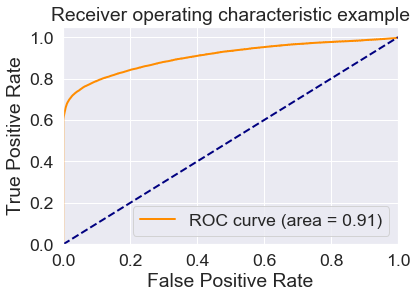

In [103]:
#Logistic Regression
modeling(lr)

In [67]:
#KNN : 로딩 속도의 문제로 돌리지 않았습니다.
#modeling(knn)

Accuracy:  0.96
Recall:  0.68
Precision 0.93
ROC AUC score:  0.9175468766052938


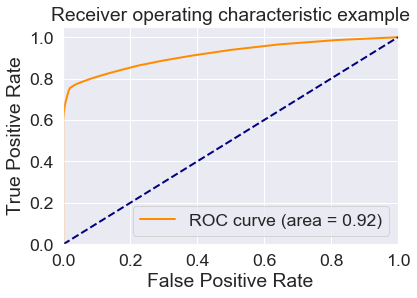

In [104]:
#랜덤포레스트
modeling(rf)

In [ ]:
#서포트벡터머신 ; 로딩 속도의 문제로 돌리지 않았습니다. 
#modeling(svc)

Accuracy:  0.91
Recall:  0.39
Precision 0.67
ROC AUC score:  0.7754610833971224


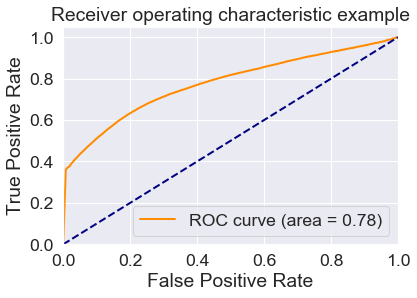

In [102]:
#Naive Bayes
modeling(nb)

6. 언더샘플링 방법 (Kaggle 인용)

In [89]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [90]:
from copy import deepcopy

def cross_validate_repeated_undersampling_full(X, Y, model, n_estimators=3, cv=StratifiedKFold(5,random_state=1)):
    
    preds = []
    true_labels = []
        
    for train_index, test_index in cv.split(X,Y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
        scores = np.zeros((n_estimators,len(y_test)))
        for i in range(n_estimators):
            num1 = len(y_train[y_train==1])
            ind0 = np.random.choice(y_train.index[y_train==0], num1) 
            ind1 = y_train.index[y_train==1] 
            ind_final = np.r_[ind0, ind1]
            X_train_subsample = X_train.loc[ind_final]
            y_train_subsample = y_train.loc[ind_final]

            clf = deepcopy(model)
            clf.fit(X_train_subsample,y_train_subsample)  
            
            probs = clf.predict_proba(X_test)[:,1]
            scores[i,:] = probs

        preds_final = scores.mean(0) 
        preds.extend(preds_final)
        preds_labels=[round(x) for x in preds]
        
        true_labels.extend(y_test)
        
    cnf_matrix = confusion_matrix(true_labels,preds_labels)
    np.set_printoptions(precision=2)

    print("Accuracy score : ", accuracy_score(true_labels,preds_labels))
    print("Recall : ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
    print("Precision: ",metrics.precision_score(true_labels,preds_labels))
    
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix
                    , classes=class_names
                    , title='Confusion matrix')
    plt.show()
        
    print("ROC AUC score in the testing dataset: ", roc_auc_score(true_labels,preds))
        
    fpr, tpr, _ = roc_curve(true_labels,preds)
    roc_auc = auc(fpr, tpr)
        
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return

In [91]:
models=[['LogisticRegression',LogisticRegression()],['RandomForest',RandomForestClassifier()],['NaiveBayes',GaussianNB()]]

Testing: LogisticRegression
Accuracy score :  0.895000206590838
Recall :  0.6677120531302296
Precision:  0.5245005692992444


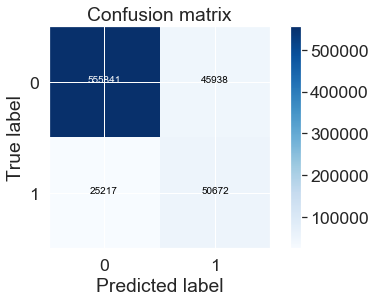

ROC AUC score in the testing dataset:  0.8205672513023292


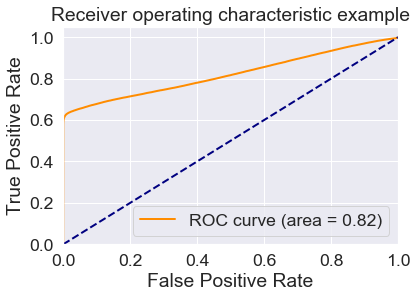

Testing: RandomForest
Accuracy score :  0.5937243606013565
Recall :  0.7581072355677371
Precision:  0.18293454585923466


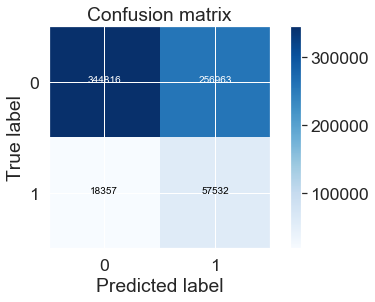

ROC AUC score in the testing dataset:  0.7633212222729304


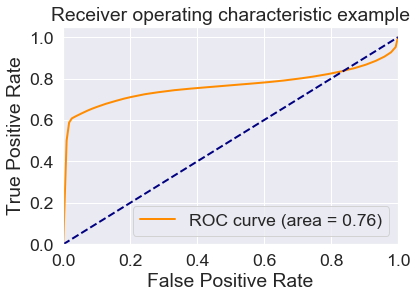

Testing: NaiveBayes
Accuracy score :  0.9005929157050355
Recall :  0.37947528627337296
Precision:  0.5868519726116727


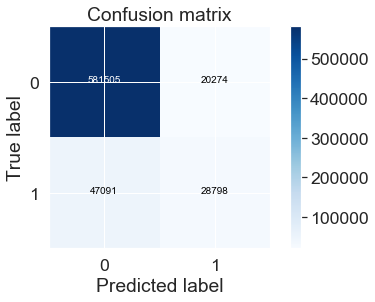

ROC AUC score in the testing dataset:  0.724323910711576


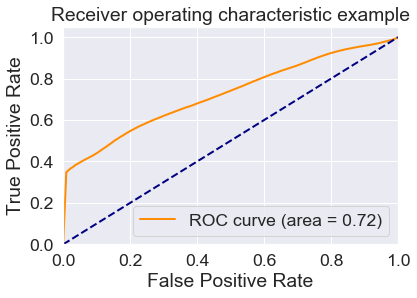

In [92]:
for e in models:
    print ("Testing:", e[0])
    cross_validate_repeated_undersampling_full(X, y, e[1])